## Schrodinger's Equation

In this module...

In [36]:
import numpy
from scipy.linalg import solve
from scipy.interpolate import spline
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [37]:
def generateMatrix(N, sigma):
    
    # Set Diagonalfrom discritization
    d = numpy.diag(numpy.ones(N-2)*(1+2j/sigma))
       
    # Set Upper Diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Set Lower Diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A                   

In [38]:
#This is what we know

def genRHS(psi, sigma): 
    
    x = psi[1:-1]*((2j/sigma)+1) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    x[0] += psi[0]
    x[-1] += psi[0]
    
    return x

In [39]:
def CrankNicolson(psi, A, nt, sigma):
    
    for t in range(nt):
        psin = psi.copy()
        x = genRHS(psin, sigma)
        
        psi_interior = solve(A, x)
        psi[1:-1] = psi_interior
        
    return psi

In [40]:
L = 1
nx = 21 #21

h = 6.62607004e-34 #[m^2*kg/s]
hbar = h/(2*numpy.pi)
m = 6.6464764063e-27 #[kg] - mass of Helium ion
dx = L/(nx-1)


psii = numpy.zeros(nx, dtype = numpy.complex)
psii[0] = 1

sigma = 0.5 #0.5
dt = sigma*(dx**2)*m/hbar
nt = 10

A = generateMatrix(nx, sigma)

print(dt)

78781.69610432451


In [41]:
#print(A)

In [42]:
psi = CrankNicolson(psii.copy(), A, nt, sigma)

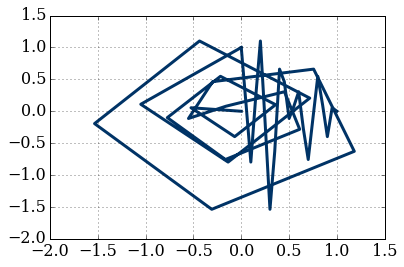

In [48]:
x = numpy.linspace(0,L,nx)

pyplot.plot(psi.imag, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

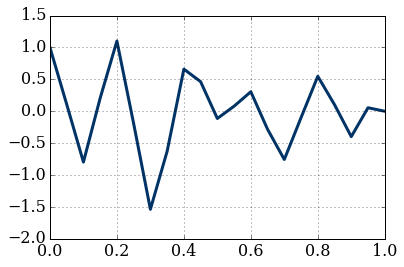

In [49]:
pyplot.plot(x, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

In [44]:
#print(psi)

In [45]:
psi_conj = numpy.conj(psi)
probfunc = psi*psi_conj

#print(psi_conj)
#print()
print(probfunc)
probfunc_real = probfunc.real
print(probfunc_real)

[ 1.00000000+0.j  1.11540066+0.j  0.65385374+0.j  0.55497548+0.j
  1.40419387+0.j  2.38935999+0.j  2.45861019+0.j  1.79048961+0.j
  1.00888775+0.j  0.30471271+0.j  0.31720870+0.j  0.03158140+0.j
  0.29769565+0.j  0.45308588+0.j  0.59969173+0.j  0.60776080+0.j
  0.34751258+0.j  0.13961769+0.j  0.16308717+0.j  0.27904538+0.j
  0.00000000+0.j]
[ 1.          1.11540066  0.65385374  0.55497548  1.40419387  2.38935999
  2.45861019  1.79048961  1.00888775  0.30471271  0.3172087   0.0315814
  0.29769565  0.45308588  0.59969173  0.6077608   0.34751258  0.13961769
  0.16308717  0.27904538  0.        ]


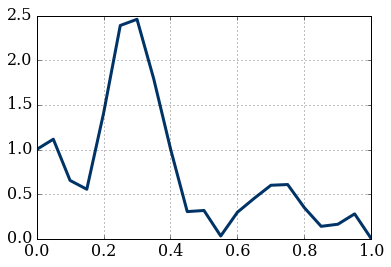

In [46]:
pyplot.plot(x, probfunc_real, color='#003366', ls='-', lw=3);
pyplot.grid(True)



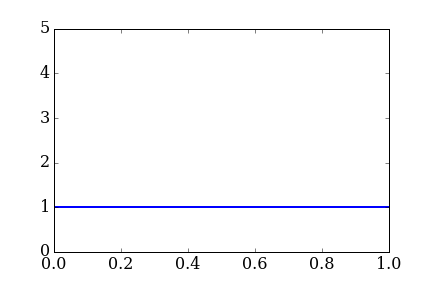
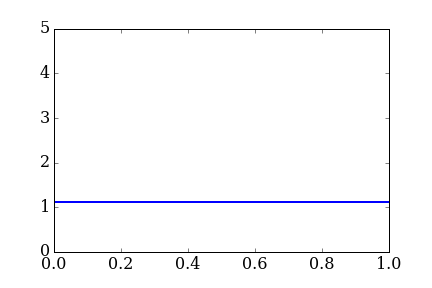
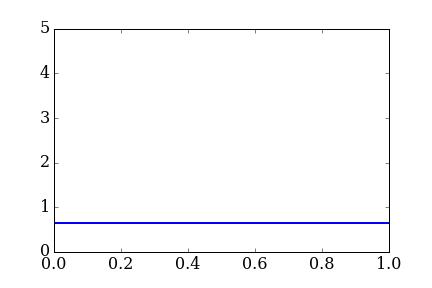
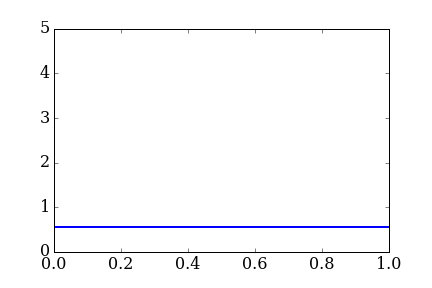
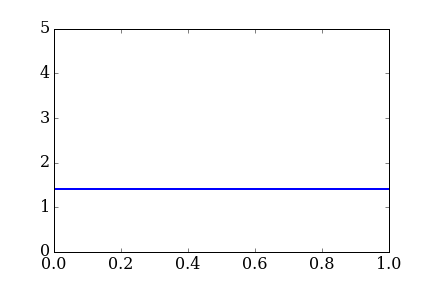
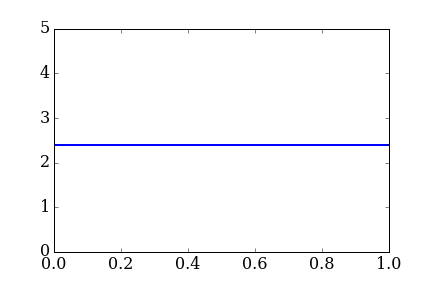
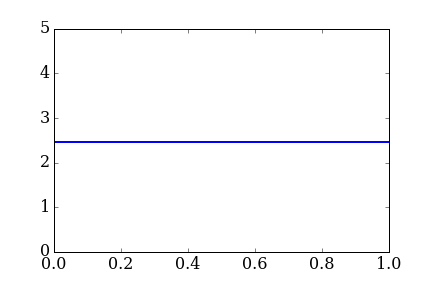
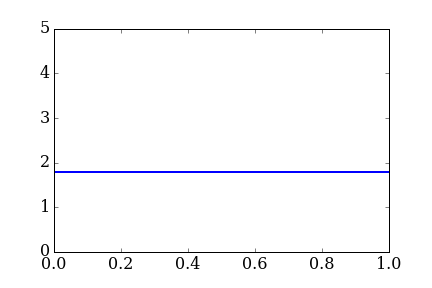
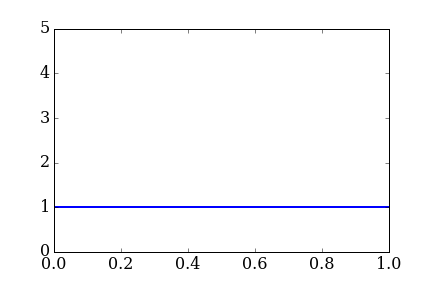
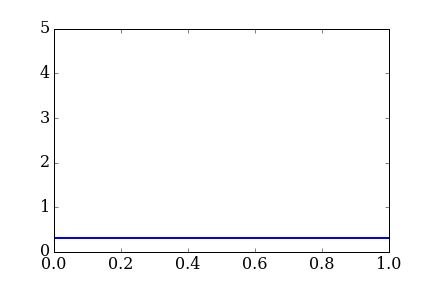
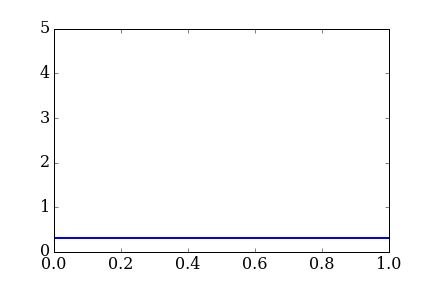
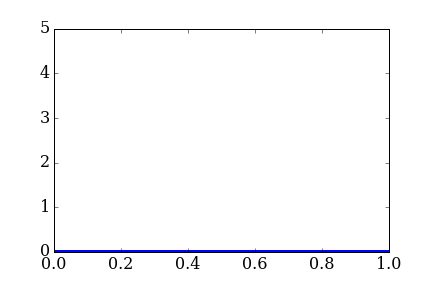
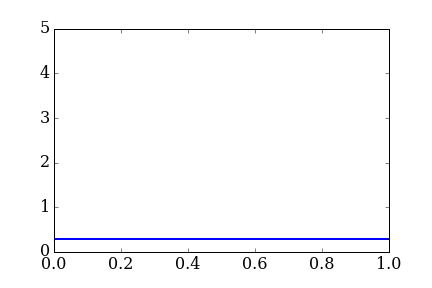
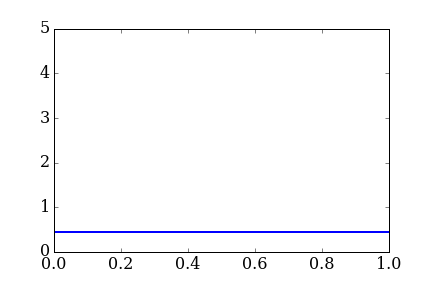
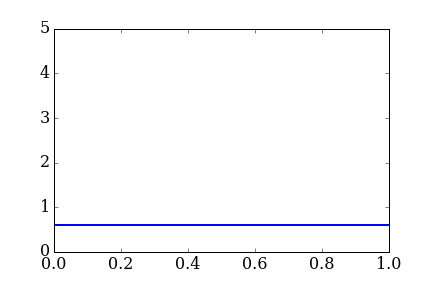
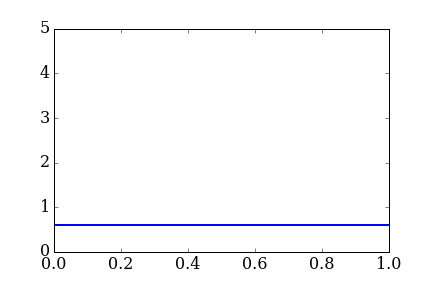
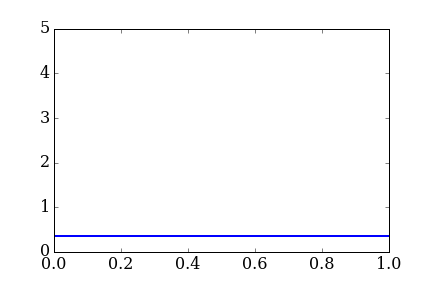
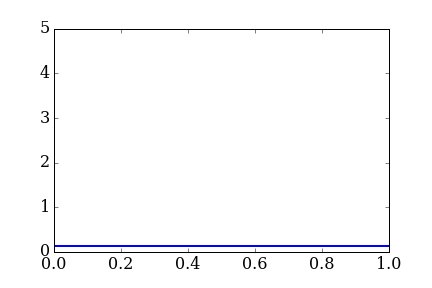
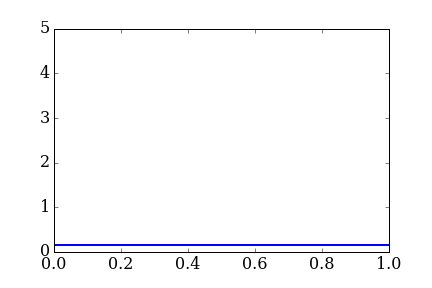
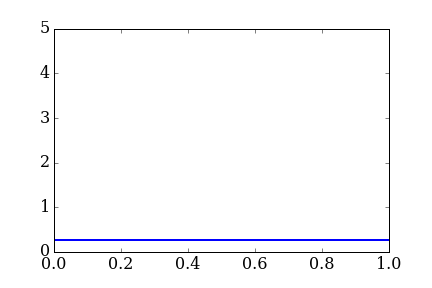
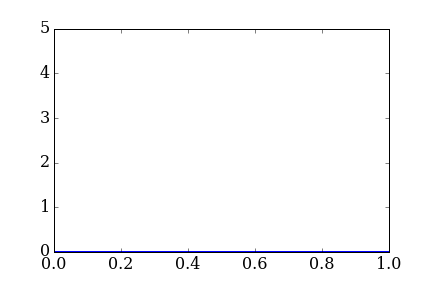

In [47]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,L), ylim = (0,5))
line, = ax.plot([],[],lw = 2)

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = probfunc_real, interval = 50)

display_animation(anim, default_mode = 'once')


In [35]:
probfunc_real.shape

(21,)